<a href="https://colab.research.google.com/github/khairillkmn/NLP_Cyberbullying/blob/main/TA_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Library**

In [1]:
!pip install Sastrawi
!pip install nltk
!pip install sklearn
!pip install wordcloud
!pip install matplotlib
!pip install seaborn
!pip install pyspellchecker

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from nltk.tokenize import word_tokenize

from spellchecker import SpellChecker

from wordcloud import WordCloud

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **2. Mengumpulkan Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/twitter_cb.xlsx'
df = pd.read_excel(file_path, index_col='No.')
df

,Nama Pelaku,Komentar,Kategori,Tanggal Posting,Nama Korban,Unnamed: 6,Unnamed: 7
No.,,,,,,,
1,@khanayarudinita,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,22 Juni 2019,@tasyakamila,NaN,NaN
2,@frdtias_,"""Jijik astagah sok bat cakep njs""",Bullying,28 Maret 2020,@eeericko,NaN,NaN
3,@belumadajudullagi,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,7 Maret 2021,@jeromepolin,NaN,NaN
4,@teukualmunawir,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,18 Desember 2020,@rosameldianti_,NaN,NaN
5,@biankarachel,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,7 Desember 2020,@rosameldianti_,NaN,NaN
...,...,...,...,...,...,...,...
646,@renaldiode_93,"""Frustasi..Sudah habis uangnya..Kasihannn""",Bullying,9 Agustus 2020,@eeericko,NaN,NaN
647,@rubybee_16,"""Tak sejelek IMAGE Owner ya..? Artis ups bukan...",Bullying,27 Desember 2020,@rosameldianti_,NaN,NaN
648,@rullyans_ighoney,"""Hati-hati mody jangan keluar sendirian jaga-j...",Non-bullying,22 Maret 2021,@maudyayunda,NaN,NaN


In [4]:
df.head(10)

,Nama Pelaku,Komentar,Kategori,Tanggal Posting,Nama Korban,Unnamed: 6,Unnamed: 7
No.,,,,,,,
1,@khanayarudinita,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,22 Juni 2019,@tasyakamila,NaN,NaN
2,@frdtias_,"""Jijik astagah sok bat cakep njs""",Bullying,28 Maret 2020,@eeericko,NaN,NaN
3,@belumadajudullagi,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,7 Maret 2021,@jeromepolin,NaN,NaN
4,@teukualmunawir,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,18 Desember 2020,@rosameldianti_,NaN,NaN
5,@biankarachel,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,7 Desember 2020,@rosameldianti_,NaN,NaN
6,@denisyundaa,"""nikmatnya bisa menghirup oksigen dengan bebas...",Non-bullying,28 Juli 2020,@isyanasarasvati,NaN,NaN
7,@lunaaluna91,"""Mudah mudahan lu jadi gembel. Amin ya Allah""",Bullying,29 November 2020,@rosameldianti_,NaN,NaN
8,@drchristlesman,"""masih good vibes walaupun sedang lapar""",Non-bullying,2 April 2021,@maudyayunda,NaN,NaN
9,@rubybee_16,"""Kakinya gedong sayyy kek kaki jantan… Upp kan...",Bullying,26 Desember 2020,@rosameldianti_,NaN,NaN


In [5]:
df.tail(10)

,Nama Pelaku,Komentar,Kategori,Tanggal Posting,Nama Korban,Unnamed: 6,Unnamed: 7
No.,,,,,,,
641,@agustindian276,"""Suka heran sama warga +62 sukanya ngehujat or...",Non-bullying,18 Desember 2020,@rosameldianti_,NaN,NaN
642,@_mang_agus_,"""Mantan Anjing, eh kebalik anjing mantan""",Bullying,20 Maret 2020,@eeericko,NaN,NaN
643,@malikah_06,"""makin tua makin muda yehh mukanya, mana canti...",Non-bullying,9 Mei 2021,@raisa6690,NaN,NaN
644,@orangejusi,"""WADUH MALAH LEBIH GANTENG ANJINGNYA. EH EH BA...",Bullying,20 Maret 2020,@eeericko,NaN,NaN
645,@arikinanta96,"""Udah mau autis iya bg awokawkk""",Bullying,13 Januari 2021,@eeericko,NaN,NaN
646,@renaldiode_93,"""Frustasi..Sudah habis uangnya..Kasihannn""",Bullying,9 Agustus 2020,@eeericko,NaN,NaN
647,@rubybee_16,"""Tak sejelek IMAGE Owner ya..? Artis ups bukan...",Bullying,27 Desember 2020,@rosameldianti_,NaN,NaN
648,@rullyans_ighoney,"""Hati-hati mody jangan keluar sendirian jaga-j...",Non-bullying,22 Maret 2021,@maudyayunda,NaN,NaN
649,@keylanamira01,"""Lu sama anjingnya, lebih baik anjingnya""",Bullying,20 Maret 2020,@eeericko,NaN,NaN


# **3. Distribusi Data**

<ipython-input-6-4f62ecbbb63b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori', data=df, palette='viridis')


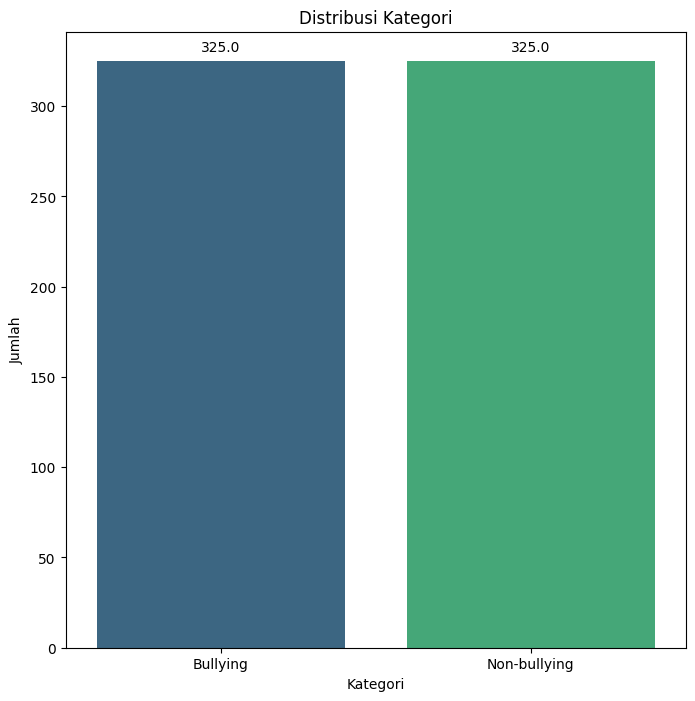

In [6]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Kategori', data=df, palette='viridis')
plt.title('Distribusi Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menambahkan angka di atas setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# **4. Preprocessing**

In [7]:
#ambil kolom yang penting saja
df = df[['Komentar', 'Kategori']]
df

,Komentar,Kategori
No.,,
1,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying
2,"""Jijik astagah sok bat cakep njs""",Bullying
3,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying
4,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying
5,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying
...,...,...
646,"""Frustasi..Sudah habis uangnya..Kasihannn""",Bullying
647,"""Tak sejelek IMAGE Owner ya..? Artis ups bukan...",Bullying
648,"""Hati-hati mody jangan keluar sendirian jaga-j...",Non-bullying


In [8]:
# Create a Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Create Stopword Remover
stopword_factory = StopWordRemoverFactory()
stopword = stopword_factory.create_stop_word_remover()

# Create SpellChecker
spell = SpellChecker()

def preprocess_text(text):
    # Case Folding
    text = text.lower()

    # Remove Punctuation, Numbers, and Symbols
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword Removal
    stop_words = set(nltk.corpus.stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Remove Connector Words (Example: dan, atau) - Customize this list
    connector_words = ['dan', 'atau', 'tapi', 'tetapi', 'namun', 'karena', 'sehingga', 'meskipun', 'makanya', 'kan', 'disebabkan', 'diakibatkan']
    tokens = [word for word in tokens if word not in connector_words]

    # Remove Slang Words (Example: gk, ga) - Customize this list
    slang_words = ['gk', 'ga', 'gak', 'tdk', 'sm', 'yg', 'bkn', 'tp', 'ttp', 'ap', 'sy', 'gw', 'sdh', 'udh', 'knp', 'gmn', 'y', 'jgn', 'org', 'dgn', 'dg', 'skrg', 'nnt', 'krn', 'ngk', 'km', 'q']
    tokens = [word for word in tokens if word not in slang_words]

    #Normalization (example, using spell checker)
    corrected_tokens = [spell.correction(word) for word in tokens]

    # Join tokens back into a string
    return " ".join(tokens)

df['Komentar_Processed'] = df['Komentar'].apply(preprocess_text)
df

<ipython-input-8-2be7d4914e39>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Komentar_Processed'] = df['Komentar'].apply(preprocess_text)


,Komentar,Kategori,Komentar_Processed
No.,,,
1,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,jelek aja anak ayah cakep
2,"""Jijik astagah sok bat cakep njs""",Bullying,jijik astagah sok bat cakep njs
3,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,kaya tulus ya muka klo liat
4,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,ular dugong
5,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,aduuh halu hhahaha lebay edit nyaa lemak mana ...
...,...,...,...
646,"""Frustasi..Sudah habis uangnya..Kasihannn""",Bullying,frustasisudah habis uangnyakasihannn
647,"""Tak sejelek IMAGE Owner ya..? Artis ups bukan...",Bullying,jelek image owner ya artis ups artis hallo lan...
648,"""Hati-hati mody jangan keluar sendirian jaga-j...",Non-bullying,hatihati mody jagajaga serang brutal rasisme w...


In [9]:
df.head(10)

,Komentar,Kategori,Komentar_Processed
No.,,,
1,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,jelek aja anak ayah cakep
2,"""Jijik astagah sok bat cakep njs""",Bullying,jijik astagah sok bat cakep njs
3,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,kaya tulus ya muka klo liat
4,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,ular dugong
5,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,aduuh halu hhahaha lebay edit nyaa lemak mana ...
6,"""nikmatnya bisa menghirup oksigen dengan bebas...",Non-bullying,nikmat hirup oksigen bebas ya
7,"""Mudah mudahan lu jadi gembel. Amin ya Allah""",Bullying,mudah mudah lu gembel amin ya allah
8,"""masih good vibes walaupun sedang lapar""",Non-bullying,good vibes lapar
9,"""Kakinya gedong sayyy kek kaki jantan… Upp kan...",Bullying,kaki gedong sayyy kek kaki jantan upp suka bau...


In [10]:
df.tail(10)

,Komentar,Kategori,Komentar_Processed
No.,,,
641,"""Suka heran sama warga +62 sukanya ngehujat or...",Non-bullying,suka heran warga suka ngehujat orang mulu paha...
642,"""Mantan Anjing, eh kebalik anjing mantan""",Bullying,mantan anjing eh balik anjing mantan
643,"""makin tua makin muda yehh mukanya, mana canti...",Non-bullying,tua muda yehh muka cantik bngett mo nangiss am...
644,"""WADUH MALAH LEBIH GANTENG ANJINGNYA. EH EH BA...",Bullying,ganteng anjing eh eh lu pantes anjing anjing s...
645,"""Udah mau autis iya bg awokawkk""",Bullying,udah autis iya bg awokawkk
646,"""Frustasi..Sudah habis uangnya..Kasihannn""",Bullying,frustasisudah habis uangnyakasihannn
647,"""Tak sejelek IMAGE Owner ya..? Artis ups bukan...",Bullying,jelek image owner ya artis ups artis hallo lan...
648,"""Hati-hati mody jangan keluar sendirian jaga-j...",Non-bullying,hatihati mody jagajaga serang brutal rasisme w...
649,"""Lu sama anjingnya, lebih baik anjingnya""",Bullying,lu anjing anjing


In [11]:
from collections import Counter

def bag_of_words(text):
    return Counter(text.split())

# Apply bag of words to the preprocessed comments
df['Bag_of_Words'] = df['Komentar_Processed'].apply(bag_of_words)
df.head(10)

<ipython-input-11-a5cda99c905c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bag_of_Words'] = df['Komentar_Processed'].apply(bag_of_words)


,Komentar,Kategori,Komentar_Processed,Bag_of_Words
No.,,,,
1,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,jelek aja anak ayah cakep,"{'jelek': 1, 'aja': 1, 'anak': 1, 'ayah': 1, '..."
2,"""Jijik astagah sok bat cakep njs""",Bullying,jijik astagah sok bat cakep njs,"{'jijik': 1, 'astagah': 1, 'sok': 1, 'bat': 1,..."
3,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,kaya tulus ya muka klo liat,"{'kaya': 1, 'tulus': 1, 'ya': 1, 'muka': 1, 'k..."
4,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,ular dugong,"{'ular': 1, 'dugong': 1}"
5,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,aduuh halu hhahaha lebay edit nyaa lemak mana ...,"{'aduuh': 1, 'halu': 1, 'hhahaha': 1, 'lebay':..."
6,"""nikmatnya bisa menghirup oksigen dengan bebas...",Non-bullying,nikmat hirup oksigen bebas ya,"{'nikmat': 1, 'hirup': 1, 'oksigen': 1, 'bebas..."
7,"""Mudah mudahan lu jadi gembel. Amin ya Allah""",Bullying,mudah mudah lu gembel amin ya allah,"{'mudah': 2, 'lu': 1, 'gembel': 1, 'amin': 1, ..."
8,"""masih good vibes walaupun sedang lapar""",Non-bullying,good vibes lapar,"{'good': 1, 'vibes': 1, 'lapar': 1}"
9,"""Kakinya gedong sayyy kek kaki jantan… Upp kan...",Bullying,kaki gedong sayyy kek kaki jantan upp suka bau...,"{'kaki': 3, 'gedong': 2, 'sayyy': 1, 'kek': 1,..."


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit dan transform data 'Komentar_Processed'
tfidf_matrix = vectorizer.fit_transform(df['Komentar_Processed'])

# Membuat DataFrame baru dari TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menggabungkan DataFrame TF-IDF dengan DataFrame asli
df_final = pd.concat([df, tfidf_df], axis=1)

# Menampilkan DataFrame baru
df_final.head(10)

,Komentar,Kategori,Komentar_Processed,Bag_of_Words,aa,aaa,aamiin,abai,abalabal,abatartila,...,yemuke,yesus,you,younger,youtube,youtuber,yuhuuu,yutuber,ziu,zoo
1,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,jelek aja anak ayah cakep,"{'jelek': 1, 'aja': 1, 'anak': 1, 'ayah': 1, '...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""Jijik astagah sok bat cakep njs""",Bullying,jijik astagah sok bat cakep njs,"{'jijik': 1, 'astagah': 1, 'sok': 1, 'bat': 1,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,kaya tulus ya muka klo liat,"{'kaya': 1, 'tulus': 1, 'ya': 1, 'muka': 1, 'k...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,ular dugong,"{'ular': 1, 'dugong': 1}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,aduuh halu hhahaha lebay edit nyaa lemak mana ...,"{'aduuh': 1, 'halu': 1, 'hhahaha': 1, 'lebay':...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"""nikmatnya bisa menghirup oksigen dengan bebas...",Non-bullying,nikmat hirup oksigen bebas ya,"{'nikmat': 1, 'hirup': 1, 'oksigen': 1, 'bebas...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"""Mudah mudahan lu jadi gembel. Amin ya Allah""",Bullying,mudah mudah lu gembel amin ya allah,"{'mudah': 2, 'lu': 1, 'gembel': 1, 'amin': 1, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"""masih good vibes walaupun sedang lapar""",Non-bullying,good vibes lapar,"{'good': 1, 'vibes': 1, 'lapar': 1}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"""Kakinya gedong sayyy kek kaki jantan… Upp kan...",Bullying,kaki gedong sayyy kek kaki jantan upp suka bau...,"{'kaki': 3, 'gedong': 2, 'sayyy': 1, 'kek': 1,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"""Kukira kehadiranmu akan menjadi sesuatu keban...",Non-bullying,kira hadir bangga,"{'kira': 1, 'hadir': 1, 'bangga': 1}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


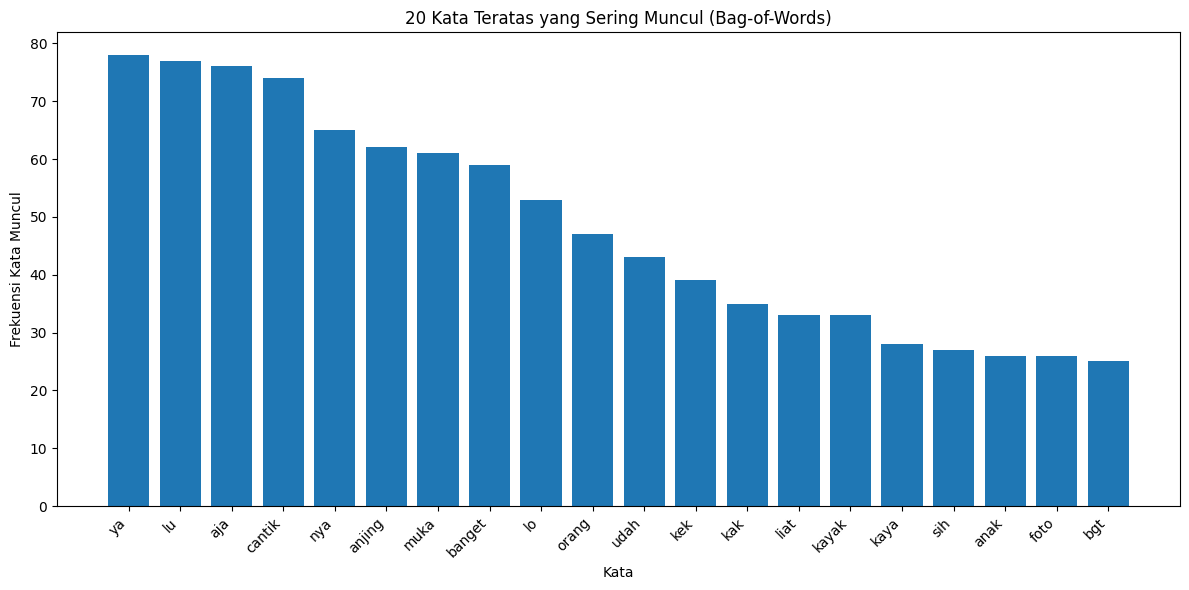

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming df and df_final are already defined as in your provided code

# Combine all bag-of-words dictionaries into one
all_words = Counter()
for bag in df['Bag_of_Words']:
    all_words.update(bag)

# Get the most common words and their counts
most_common_words = all_words.most_common(20)  # Show top 20 words

# Extract words and counts for plotting
words, counts = zip(*most_common_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('Kata')
plt.ylabel('Frekuensi Kata Muncul')
plt.title('20 Kata Teratas yang Sering Muncul (Bag-of-Words)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

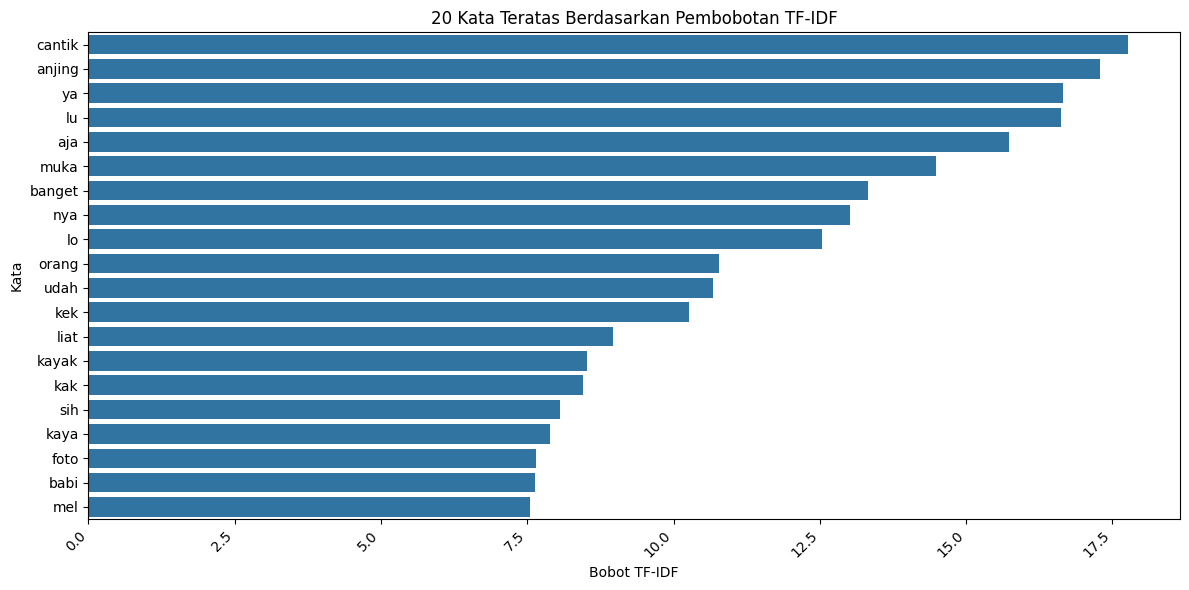

In [14]:
# Assuming tfidf_df is already created as in your previous code

# Calculate the sum of TF-IDF values for each word across all documents
word_tfidf_sum = tfidf_df.sum(axis=0)

# Sort words by their TF-IDF sum in descending order
sorted_words = word_tfidf_sum.sort_values(ascending=False)

# Take the top N words (e.g., top 20)
top_n = 20
top_words = sorted_words[:top_n]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index)
plt.xlabel('Bobot TF-IDF')
plt.ylabel('Kata')
plt.title(f'{top_n} Kata Teratas Berdasarkan Pembobotan TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Assuming tfidf_df is already created as in your previous code

# Calculate the sum of TF-IDF values for each word across all documents
word_tfidf_sum = tfidf_df.sum(axis=0)

# Display the TF-IDF weights for each word
word_tfidf_sum

,0
aa,0.218907
aaa,0.496367
aamiin,1.712757
abai,0.435769
abalabal,0.378857
...,...
youtuber,0.389909
yuhuuu,0.352331
yutuber,0.304932
ziu,0.432949


In [16]:
pd.set_option('display.max_rows', None)

word_tfidf_sum.sort_values(ascending=False)

,0
cantik,17.765253
anjing,17.294796
ya,16.650335
lu,16.613337
aja,15.734441
muka,14.479819
banget,13.319434
nya,13.012698
lo,12.536775
orang,10.781873


In [17]:
# Assuming df and df_final are already defined as in your provided code

# Combine all bag-of-words dictionaries into one
all_words = Counter()
for bag in df['Bag_of_Words']:
    all_words.update(bag)

# Convert the Counter object to a DataFrame
word_distribution = pd.DataFrame.from_dict(all_words, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
word_distribution = word_distribution.sort_values('Count', ascending=False)

# Display the word distribution
word_distribution

,Count
ya,78
lu,77
aja,76
cantik,74
nya,65
anjing,62
muka,61
banget,59
lo,53
orang,47


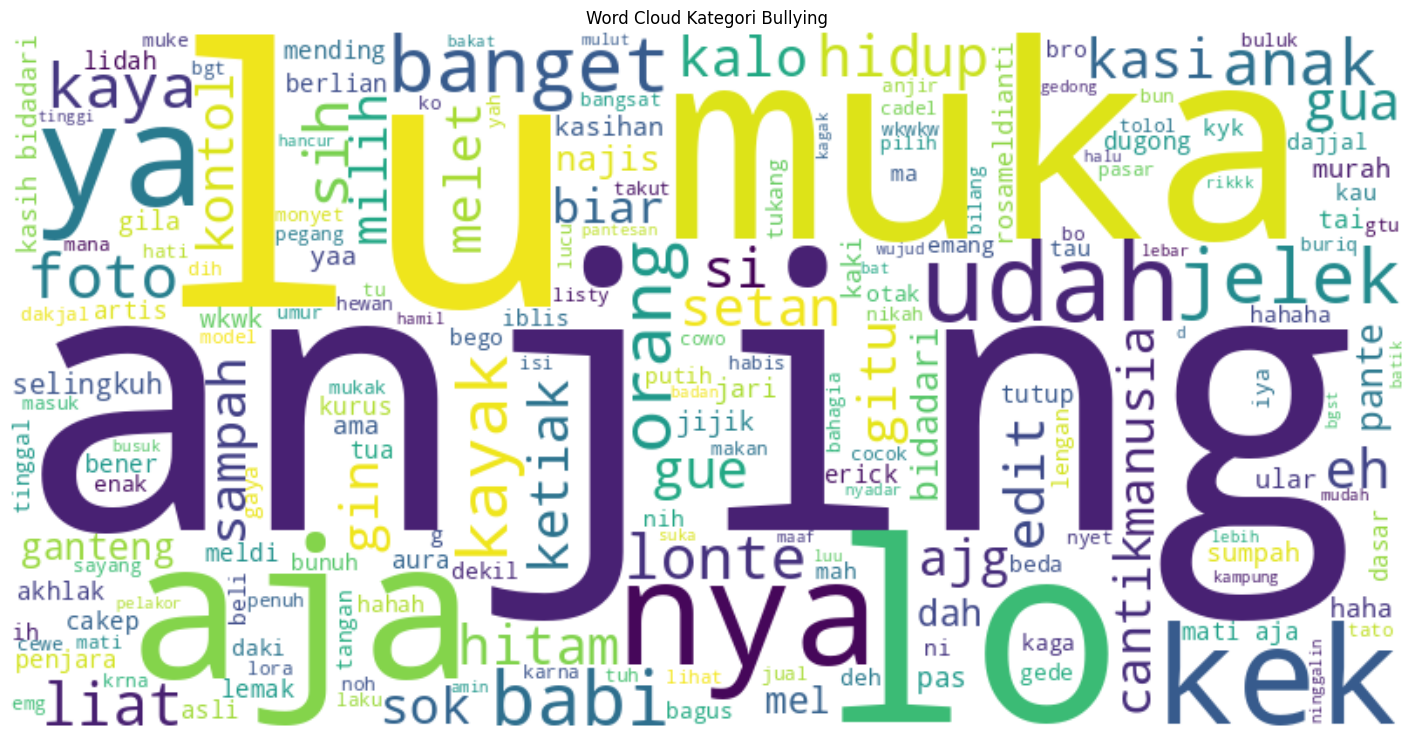

In [18]:
# Filter the DataFrame for the 'Bullying' category
bullying_df = df[df['Kategori'] == 'Bullying']

# Combine all preprocessed comments from the 'Bullying' category
text = " ".join(bullying_df['Komentar_Processed'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(18, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Kategori Bullying')
plt.show()

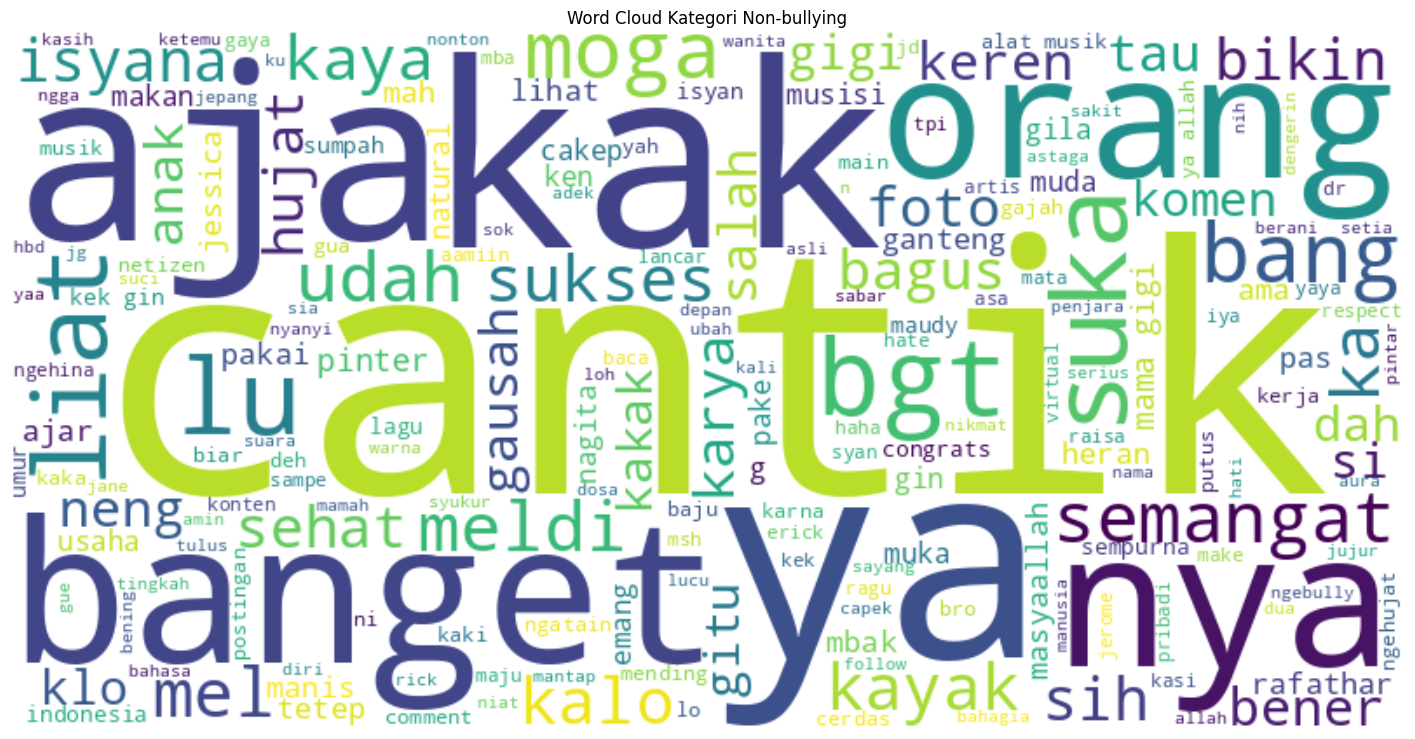

In [19]:
# Filter the DataFrame for the 'Non-bullying' category
non_bullying_df = df[df['Kategori'] == 'Non-bullying']

# Combine all preprocessed comments from the 'Non-bullying' category
text = " ".join(non_bullying_df['Komentar_Processed'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(18, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Kategori Non-bullying')
plt.show()

In [20]:
# Assuming df and df_final are already defined as in your provided code

# Combine all bag-of-words dictionaries into one
all_words = Counter()
for bag in df['Bag_of_Words']:
    all_words.update(bag)

# Get the number of unique words
num_unique_words = len(all_words)

print(f"Jumlah kata unik: {num_unique_words}")

Jumlah kata unik: 1726


In [23]:
# Create a new DataFrame with the modified 'Kategori' column
new_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

new_df.Kategori.replace("Bullying", 1 , inplace = True)
new_df.Kategori.replace("Non-bullying", 0 , inplace = True)

new_df.head(10)

<ipython-input-23-194d00ce3886>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df.Kategori.replace("Bullying", 1 , inplace = True)
<ipython-input-23-194d00ce3886>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,Komentar,Kategori,Komentar_Processed,Bag_of_Words
No.,,,,
1,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",1,jelek aja anak ayah cakep,"{'jelek': 1, 'aja': 1, 'anak': 1, 'ayah': 1, '..."
2,"""Jijik astagah sok bat cakep njs""",1,jijik astagah sok bat cakep njs,"{'jijik': 1, 'astagah': 1, 'sok': 1, 'bat': 1,..."
3,"""Kaya tulus ya mukanya klo diliat2""",0,kaya tulus ya muka klo liat,"{'kaya': 1, 'tulus': 1, 'ya': 1, 'muka': 1, 'k..."
4,"""Jadi diri sendiri, jangan jadi ular apalagi d...",1,ular dugong,"{'ular': 1, 'dugong': 1}"
5,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",1,aduuh halu hhahaha lebay edit nyaa lemak mana ...,"{'aduuh': 1, 'halu': 1, 'hhahaha': 1, 'lebay':..."
6,"""nikmatnya bisa menghirup oksigen dengan bebas...",0,nikmat hirup oksigen bebas ya,"{'nikmat': 1, 'hirup': 1, 'oksigen': 1, 'bebas..."
7,"""Mudah mudahan lu jadi gembel. Amin ya Allah""",1,mudah mudah lu gembel amin ya allah,"{'mudah': 2, 'lu': 1, 'gembel': 1, 'amin': 1, ..."
8,"""masih good vibes walaupun sedang lapar""",0,good vibes lapar,"{'good': 1, 'vibes': 1, 'lapar': 1}"
9,"""Kakinya gedong sayyy kek kaki jantan… Upp kan...",1,kaki gedong sayyy kek kaki jantan upp suka bau...,"{'kaki': 3, 'gedong': 2, 'sayyy': 1, 'kek': 1,..."


# **5. Model Klasifikasi**

In [26]:
#split data train dan test
XX = new_df['Komentar_Processed']
yy = new_df['Kategori']
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

In [30]:
#jumlah data train dan test
print(f"Jumlah data train: {len(XX_train)}")
print(f"Jumlah data test: {len(XX_test)}")

Jumlah data train: 520
Jumlah data test: 130


In [31]:
#jumlah data train dan test
print(f"Jumlah data train: {len(yy_train)}")
print(f"Jumlah data test: {len(yy_test)}")

Jumlah data train: 520
Jumlah data test: 130


# **NAIVE BAYES**

Klasifikasi Naive Bayes (Data Training):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       261
           1       0.98      0.98      0.98       259

    accuracy                           0.98       520
   macro avg       0.98      0.98      0.98       520
weighted avg       0.98      0.98      0.98       520



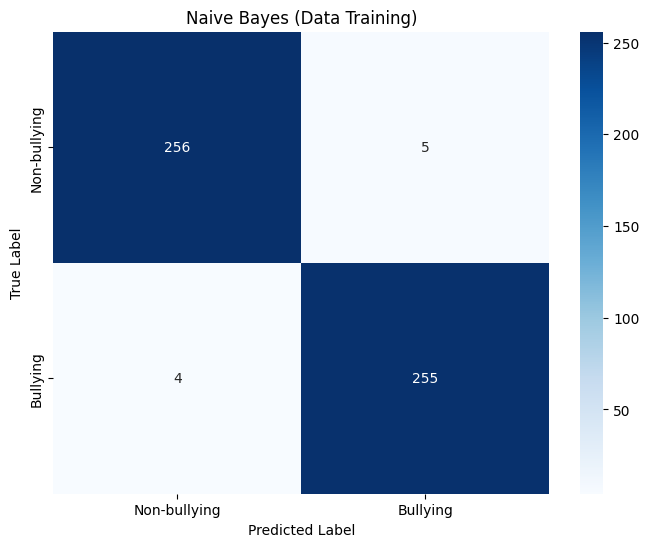

In [35]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(vectorizer.transform(XX_train), yy_train)
yy_pred_train = nb_classifier.predict(vectorizer.transform(XX_train))

# Classification Report for Training Data
print("Klasifikasi Naive Bayes (Data Training):")
print(classification_report(yy_train, yy_pred_train))

# Confusion Matrix for Training Data
cm_train = confusion_matrix(yy_train, yy_pred_train)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes (Data Training)')
plt.show()

Klasifikasi Naive Bayes (Data Testing):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        64
           1       0.82      0.91      0.86        66

    accuracy                           0.85       130
   macro avg       0.86      0.85      0.85       130
weighted avg       0.86      0.85      0.85       130



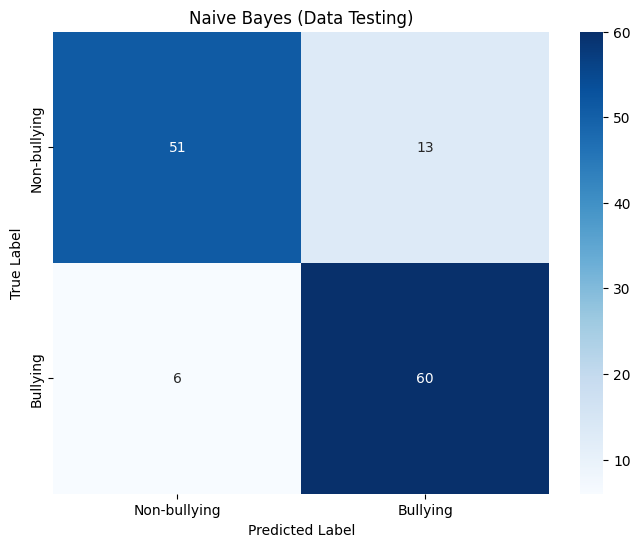

In [37]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(vectorizer.transform(XX_train), yy_train)
yy_pred_test = nb_classifier.predict(vectorizer.transform(XX_test))

# Classification Report for Testing Data
print("Klasifikasi Naive Bayes (Data Testing):")
print(classification_report(yy_test, yy_pred_test))

# Confusion Matrix for Training Data
cm_test = confusion_matrix(yy_test, yy_pred_test)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes (Data Testing)')
plt.show()

# **SVM**

Klasifikasi SVM (Data Training):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       261
           1       0.99      0.98      0.99       259

    accuracy                           0.99       520
   macro avg       0.99      0.99      0.99       520
weighted avg       0.99      0.99      0.99       520



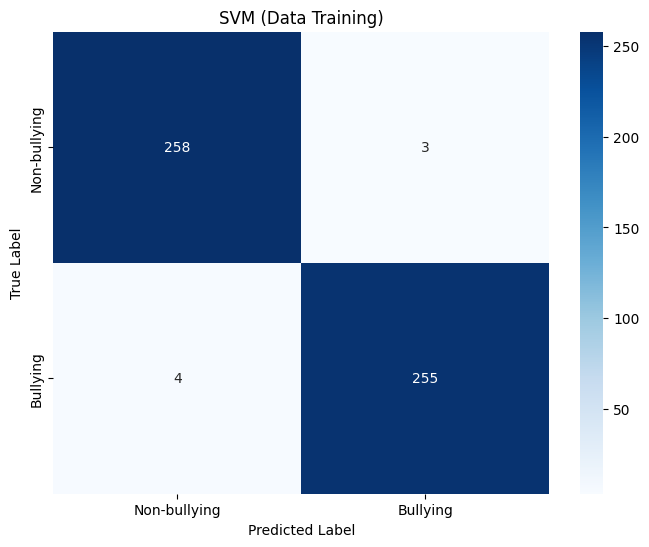

In [38]:
# SVM Classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels
svm_classifier.fit(vectorizer.transform(XX_train), yy_train)

yy_pred_train_svm = svm_classifier.predict(vectorizer.transform(XX_train))

# Classification Report for Training Data
print("Klasifikasi SVM (Data Training):")
print(classification_report(yy_train, yy_pred_train_svm))

# Confusion Matrix for Training Data
cm_train_svm = confusion_matrix(yy_train, yy_pred_train_svm)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM (Data Training)')
plt.show()

Klasifikasi SVM (Data Testing):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        64
           1       0.85      0.79      0.82        66

    accuracy                           0.82       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.83      0.82      0.82       130



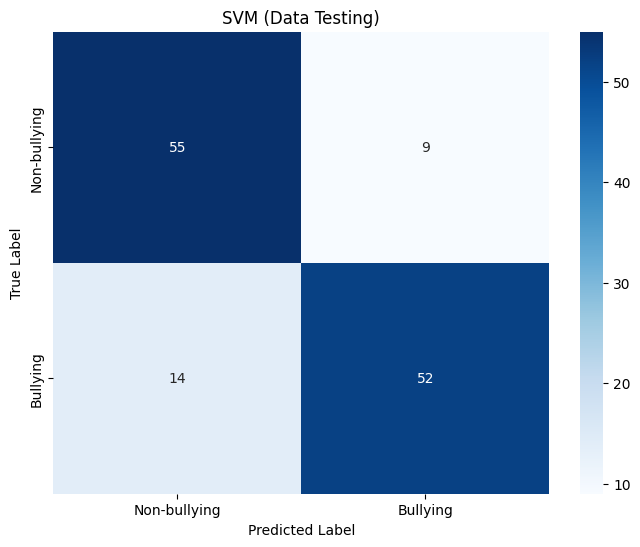

In [39]:
# SVM Classifier for testing data
yy_pred_test_svm = svm_classifier.predict(vectorizer.transform(XX_test))

# Classification Report for Testing Data
print("Klasifikasi SVM (Data Testing):")
print(classification_report(yy_test, yy_pred_test_svm))

# Confusion Matrix for Testing Data
cm_test_svm = confusion_matrix(yy_test, yy_pred_test_svm)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM (Data Testing)')
plt.show()

# **RANDOM FOREST**

Klasifikasi Random Forest (Data Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       259

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520



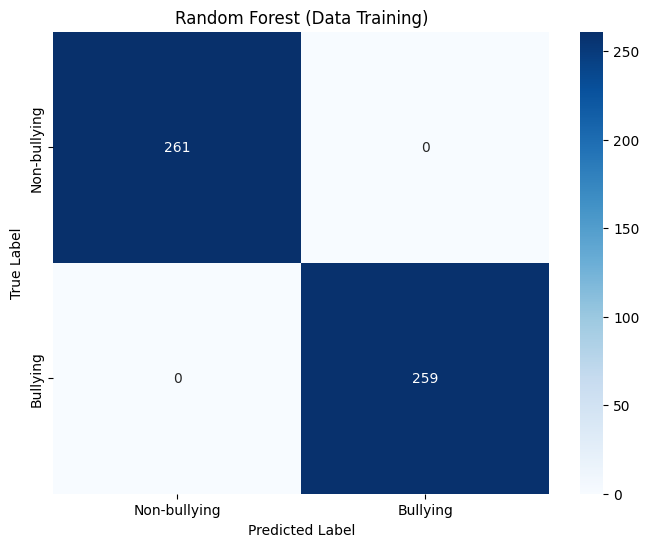

In [40]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(vectorizer.transform(XX_train), yy_train)

yy_pred_train_rf = rf_classifier.predict(vectorizer.transform(XX_train))

# Classification Report for Training Data
print("Klasifikasi Random Forest (Data Training):")
print(classification_report(yy_train, yy_pred_train_rf))

# Confusion Matrix for Training Data
cm_train_rf = confusion_matrix(yy_train, yy_pred_train_rf)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (Data Training)')
plt.show()

Klasifikasi Random Forest (Data Testing):
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        64
           1       0.88      0.79      0.83        66

    accuracy                           0.84       130
   macro avg       0.84      0.84      0.84       130
weighted avg       0.84      0.84      0.84       130



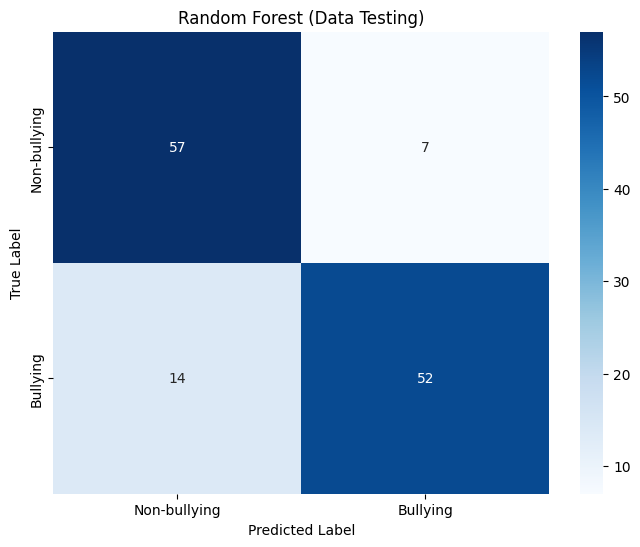

In [41]:
# Random Forest Classifier for testing data
yy_pred_test_rf = rf_classifier.predict(vectorizer.transform(XX_test))

# Classification Report for Testing Data
print("Klasifikasi Random Forest (Data Testing):")
print(classification_report(yy_test, yy_pred_test_rf))

# Confusion Matrix for Testing Data
cm_test_rf = confusion_matrix(yy_test, yy_pred_test_rf)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (Data Testing)')
plt.show()

# **DECISION TREE**

Klasifikasi Decision Tree (Data Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       259

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520



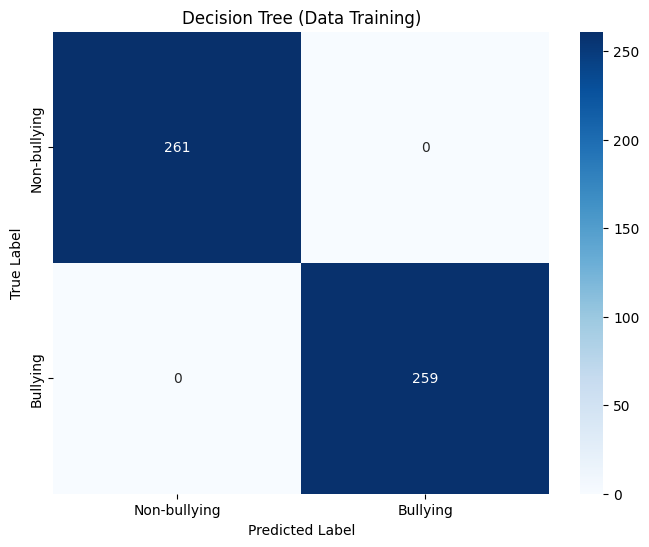

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
dt_classifier.fit(vectorizer.transform(XX_train), yy_train)

yy_pred_train_dt = dt_classifier.predict(vectorizer.transform(XX_train))

# Classification Report for Training Data
print("Klasifikasi Decision Tree (Data Training):")
print(classification_report(yy_train, yy_pred_train_dt))

# Confusion Matrix for Training Data
cm_train_dt = confusion_matrix(yy_train, yy_pred_train_dt)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree (Data Training)')
plt.show()

Klasifikasi Decision Tree (Data Testing):
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        64
           1       0.78      0.71      0.75        66

    accuracy                           0.75       130
   macro avg       0.76      0.75      0.75       130
weighted avg       0.76      0.75      0.75       130



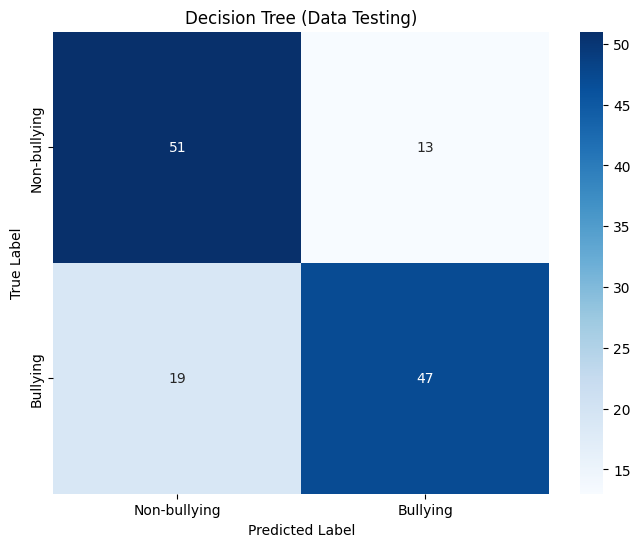

In [43]:
# Decision Tree Classifier for testing data
yy_pred_test_dt = dt_classifier.predict(vectorizer.transform(XX_test))

# Classification Report for Testing Data
print("Klasifikasi Decision Tree (Data Testing):")
print(classification_report(yy_test, yy_pred_test_dt))

# Confusion Matrix for Testing Data
cm_test_dt = confusion_matrix(yy_test, yy_pred_test_dt)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree (Data Testing)')
plt.show()

# **KNN**

Klasifikasi KNN (Data Training):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       261
           1       0.87      0.91      0.89       259

    accuracy                           0.89       520
   macro avg       0.89      0.89      0.89       520
weighted avg       0.89      0.89      0.89       520



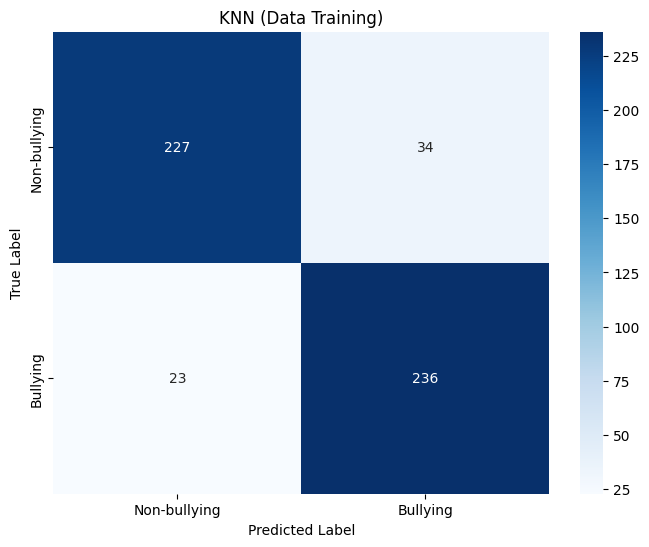

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_classifier.fit(vectorizer.transform(XX_train), yy_train)

yy_pred_train_knn = knn_classifier.predict(vectorizer.transform(XX_train))

# Classification Report for Training Data
print("Klasifikasi KNN (Data Training):")
print(classification_report(yy_train, yy_pred_train_knn))

# Confusion Matrix for Training Data
cm_train_knn = confusion_matrix(yy_train, yy_pred_train_knn)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN (Data Training)')
plt.show()

Klasifikasi KNN (Data Testing):
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        64
           1       0.77      0.86      0.81        66

    accuracy                           0.80       130
   macro avg       0.80      0.80      0.80       130
weighted avg       0.80      0.80      0.80       130



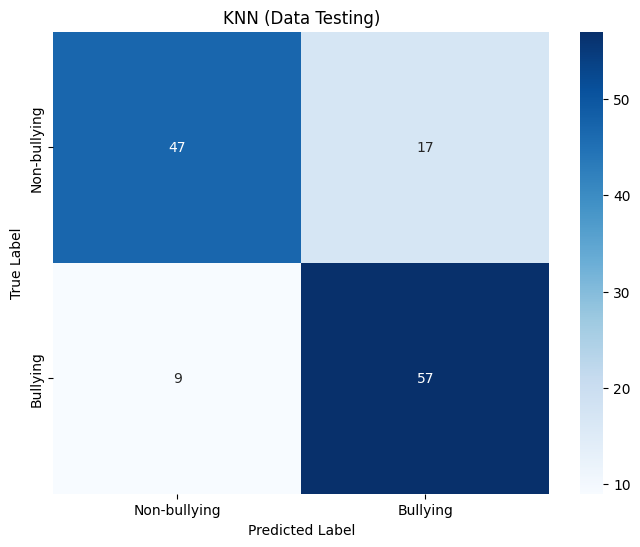

In [45]:
# KNN Classifier for testing data
yy_pred_test_knn = knn_classifier.predict(vectorizer.transform(XX_test))

# Classification Report for Testing Data
print("Klasifikasi KNN (Data Testing):")
print(classification_report(yy_test, yy_pred_test_knn))

# Confusion Matrix for Testing Data
cm_test_knn = confusion_matrix(yy_test, yy_pred_test_knn)

# Plot Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN (Data Testing)')
plt.show()

# **ANN**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4906 - loss: 0.6930 - val_accuracy: 0.7500 - val_loss: 0.6844
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7453 - loss: 0.6788 - val_accuracy: 0.7692 - val_loss: 0.6738
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9112 - loss: 0.6548 - val_accuracy: 0.8654 - val_loss: 0.6422
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9247 - loss: 0.5894 - val_accuracy: 0.8654 - val_loss: 0.5724
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9547 - loss: 0.4677 - val_accuracy: 0.8462 - val_loss: 0.4701
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9681 - loss: 0.2875 - val_accuracy: 0.8269 - val_loss: 0.3880
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9897 - loss: 0.1504 - val_accuracy: 0.8269 - val_loss: 0.3526
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9898 - loss: 0.0872 - val_accuracy: 0.8269 - val_loss: 0.3453
Ep

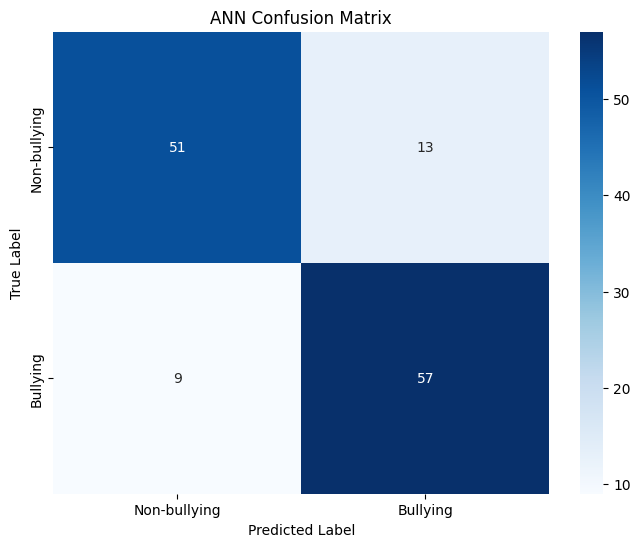

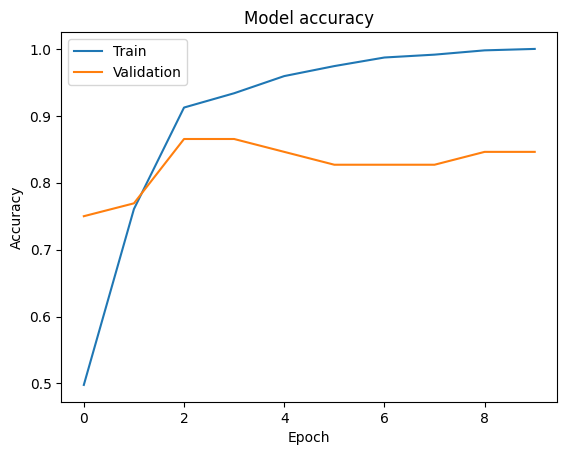

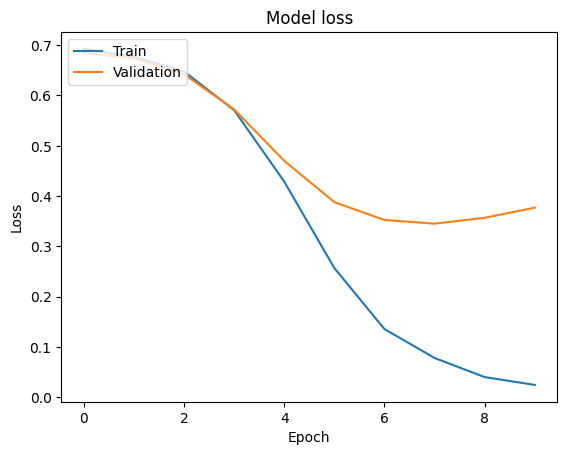

In [57]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming XX_train, XX_test, yy_train, yy_test, and vectorizer are defined as in your previous code

# Convert sparse matrix to dense for ANN
X_train_dense = vectorizer.transform(XX_train).toarray()
X_test_dense = vectorizer.transform(XX_test).toarray()

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_dense.shape[1],)),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, yy_train, epochs=10, batch_size=32, validation_split=0.1) # Adjust epochs and batch_size

# Evaluate the model
loss, accuracy = model.evaluate(X_test_dense, yy_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels (0 or 1)

# Classification Report
print(classification_report(yy_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(yy_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ANN Confusion Matrix')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **CNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 353ms/step - accuracy: 0.5837 - loss: 0.6681 - val_accuracy: 0.7692 - val_loss: 0.5215
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.8885 - loss: 0.3467 - val_accuracy: 0.8077 - val_loss: 0.4550
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.9580 - loss: 0.1201 - val_accuracy: 0.8077 - val_loss: 0.5416
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.9923 - loss: 0.0462 - val_accuracy: 0.8654 - val_loss: 0.6063
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.9970 - loss: 0.0120 - val_accuracy: 0.8462 - val_loss: 0.7335
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 519ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8269 - val_loss: 0.7774
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8462 - val_loss: 0.8012
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 452ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 

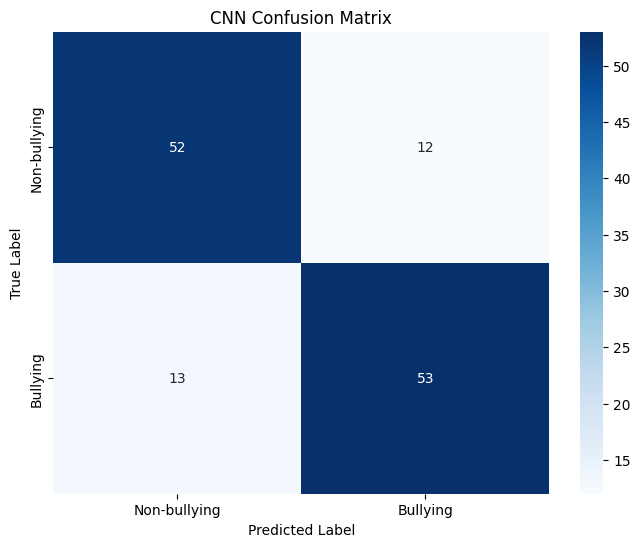

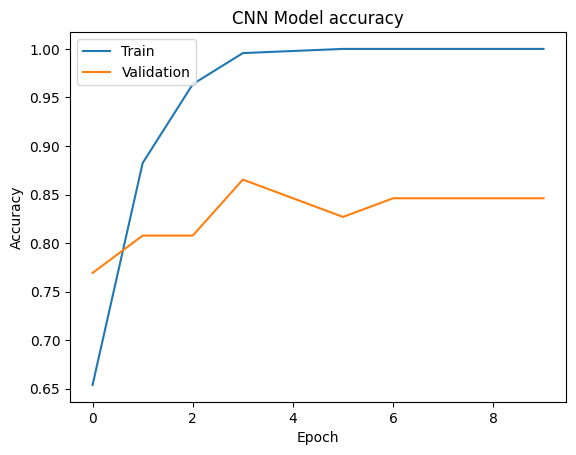

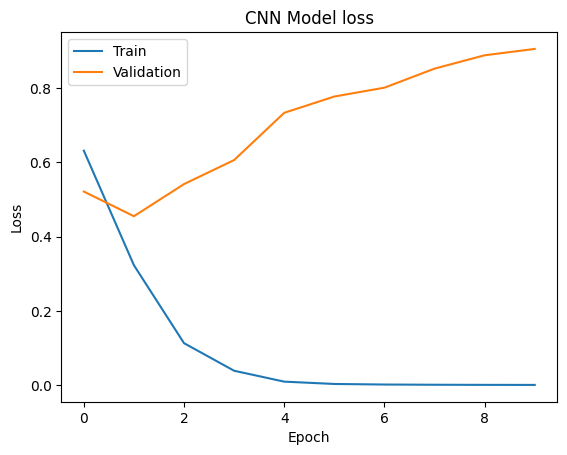

In [58]:
# Convert sparse matrix to dense for CNN
X_train_dense = vectorizer.transform(XX_train).toarray()
X_test_dense = vectorizer.transform(XX_test).toarray()

# Reshape the data for CNN input (assuming 1 channel)
X_train_cnn = X_train_dense.reshape(X_train_dense.shape[0], X_train_dense.shape[1], 1)
X_test_cnn = X_test_dense.reshape(X_test_dense.shape[0], X_test_dense.shape[1], 1)


# Define the CNN model
model_cnn = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, yy_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, yy_test)
print(f"CNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

# Make predictions
y_pred_prob_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)

# Classification Report
print(classification_report(yy_test, y_pred_cnn))

# Confusion Matrix
cm_cnn = confusion_matrix(yy_test, y_pred_cnn)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **RNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.5655 - loss: 0.6912 - val_accuracy: 0.7692 - val_loss: 0.6845
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9039 - loss: 0.6651 - val_accuracy: 0.7885 - val_loss: 0.6721
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9600 - loss: 0.6340 - val_accuracy: 0.8077 - val_loss: 0.6519
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9793 - loss: 0.5880 - val_accuracy: 0.8269 - val_loss: 0.6238
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9613 - loss: 0.5363 - val_accuracy: 0.8462 - val_loss: 0.5887
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9785 - loss: 0.4724 - val_accuracy: 0.8269 - val_loss: 0.5556
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9836 - loss: 0.4031 - val_accuracy: 0.8269 - val_loss: 0.5201
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9841 - loss: 0.3322 - val_accuracy: 0.8462 - 

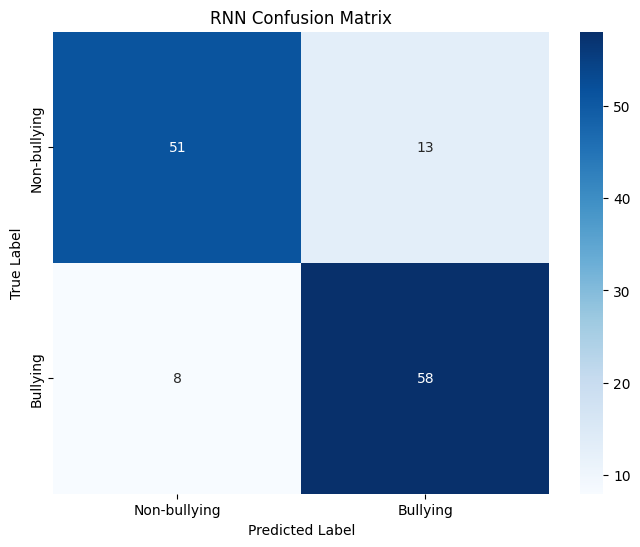

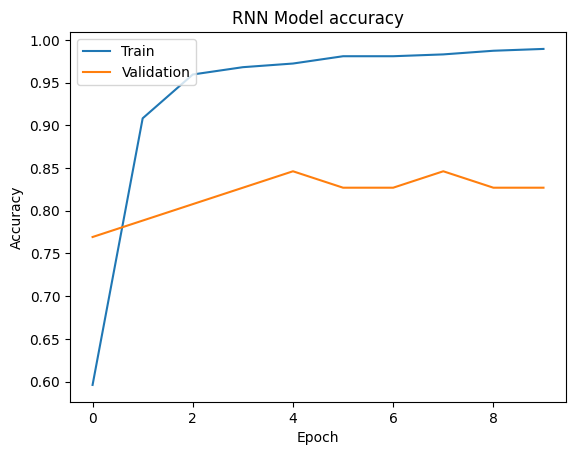

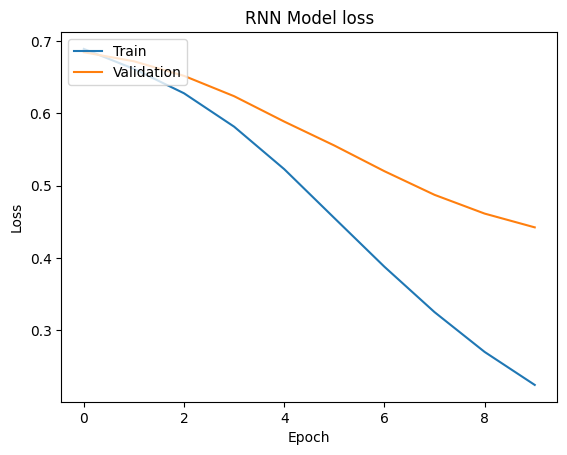

In [59]:
# Convert sparse matrix to dense for RNN
X_train_dense = vectorizer.transform(XX_train).toarray()
X_test_dense = vectorizer.transform(XX_test).toarray()

# Reshape the data for RNN input
X_train_rnn = X_train_dense.reshape(X_train_dense.shape[0], 1, X_train_dense.shape[1])
X_test_rnn = X_test_dense.reshape(X_test_dense.shape[0], 1, X_test_dense.shape[1])


# Define the RNN model
model_rnn = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train_rnn, yy_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, yy_test)
print(f"RNN Test Loss: {loss_rnn:.4f}")
print(f"RNN Test Accuracy: {accuracy_rnn:.4f}")

# Make predictions
y_pred_prob_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)

# Classification Report
print(classification_report(yy_test, y_pred_rnn))

# Confusion Matrix
cm_rnn = confusion_matrix(yy_test, y_pred_rnn)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RNN Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **6. Evaluasi dan Perbandingan Model Klasifikasi**

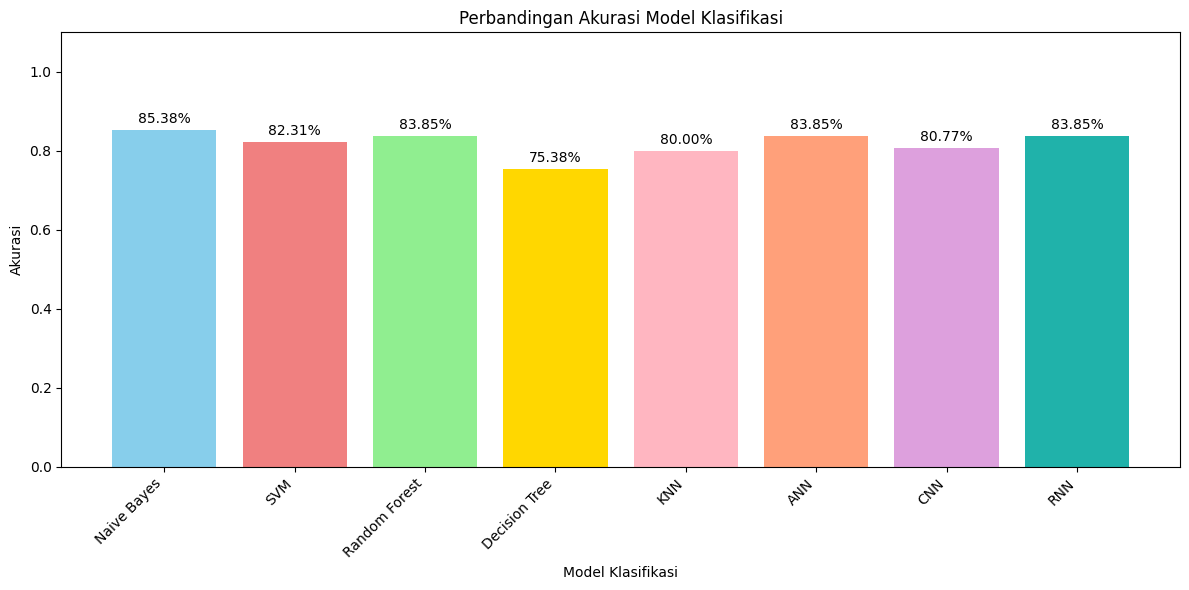

In [69]:
# Assuming you have the accuracy scores for each model
accuracy_scores = {
    'Naive Bayes': accuracy_score(yy_test, yy_pred_test),
    'SVM': accuracy_score(yy_test, yy_pred_test_svm),
    'Random Forest': accuracy_score(yy_test, yy_pred_test_rf),
    'Decision Tree': accuracy_score(yy_test, yy_pred_test_dt),
    'KNN': accuracy_score(yy_test, yy_pred_test_knn),
    'ANN': accuracy,
    'CNN': accuracy_cnn,
    'RNN': accuracy_rnn,
}

models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightsalmon', 'plum', 'lightseagreen'])

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2%}', ha='center', va='bottom')

plt.xlabel("Model Klasifikasi")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Model Klasifikasi")
plt.ylim(0, 1.1)  # Adjust y-axis limit if needed
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout() #prevent labels from overlapping
plt.show()